# %%
#  Plots on selected model 

* model: (50t,600,10)
* scale: 125

In [1]:
import pandas as pd 
import numpy as np
from helpers import potus
import glob
import re
import os

import matplotlib.pyplot as plt
import seaborn as sns

importing helper functions


In [2]:
import imp
imp.reload(potus)

<module 'helpers.potus' from '/mnt/batch/tasks/shared/LS_root/mounts/clusters/ilab2-aj/code/Users/12823819/ilab2/helpers/potus.py'>

In [3]:
# %%
import helpers.process as process
from helpers import io as pickle_io
from gensim.models import ldamodel
from gensim.models import CoherenceModel
import pyLDAvis
import tqdm
from helpers import potus
import gc
import logging
import numpy as np
logging.basicConfig(format=logging.BASIC_FORMAT, level=logging.INFO)


root_folder = potus.rootFolder('potus_50t_600_10')

lda_model_fn = root_folder + '/lda.model'
print(f'load lda model from {lda_model_fn}')
lda_model = ldamodel.LdaModel.load(lda_model_fn)

INFO:gensim.utils:loading LdaModel object from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
INFO:gensim.utils:loading expElogbeta from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.expElogbeta.npy with mmap=None


load lda model from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model


INFO:gensim.utils:setting ignored attribute id2word to None
INFO:gensim.utils:setting ignored attribute state to None
INFO:gensim.utils:setting ignored attribute dispatcher to None
INFO:gensim.utils:loaded /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
INFO:gensim.utils:loading LdaState object from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.state
INFO:gensim.utils:loaded /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.state


In [4]:
# %%
#  print topics and top terms in topic
def print_topic(lda_model, topicid, n):
    topic_terms = lda_model.get_topic_terms(topicid, topn=n)
    terms = list()
    probs = list()
    for termid, prob in topic_terms:
        term = lda_model.id2word.get(termid)
        terms.append(term)
        probs.append(prob)
    terms = ' '.join(terms)
    print(f'Topic {topicid:02}: {terms}')

    
#  print topics and top terms in topic
def get_topic(lda_model, topicid, n):
    topic_terms = lda_model.get_topic_terms(topicid, topn=n)
    terms = list()
    probs = list()
    for termid, prob in topic_terms:
        term = lda_model.id2word.get(termid)
        terms.append(term)
        probs.append(prob)
    terms = ' '.join(terms)
    return(f'Topic {topicid:02}: {terms}')
    

## (50t,600,10)

Load results for scales 125 and 25.

In [5]:
exp = 'potus_50t_600_10'
scales = [25]
result = potus.gridExpResult(exp, scales)

print(len(result.df))
print(len(result.settings))
display(result.settings)
display(result.df.groupby('Nw').speech.count())

INFO:gensim.utils:loading LdaModel object from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
INFO:gensim.utils:loading expElogbeta from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.expElogbeta.npy with mmap=None
INFO:gensim.utils:setting ignored attribute id2word to None
INFO:gensim.utils:setting ignored attribute state to None
INFO:gensim.utils:setting ignored attribute dispatcher to None
INFO:gensim.utils:loaded /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
INFO:gensim.utils:loading LdaState object from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.state
INFO:gensim.utils:loaded /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.state


load lda model from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
load bow from  /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/bow.pkl
File exists and is readable
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_100_100.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_125_125.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_25_25.pkl
t: 50, Nw: 25, Tw:25


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


962  before trim
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_50_50.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_75_75.pkl
962
1


,kld_filename,topics,Nw,Tw,path
0,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...


Nw
25    962
Name: speech, dtype: int64

# Prepare ts object


a pandas data frame with a date column set as index. date is converted using `pd.to_datetime`

In [105]:
result.df.date = pd.to_datetime(result.df.date)

In [106]:
result.df.head()


,speaker,file_name,file_path,raw_tuple,title,date,speech,speech_len,probs,token_count,novelty,transience,resonance,kld_filename,topics,Nw,Tw,path,_merge
0,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[0.00018299, 1.284e-05, 0.01475338, 0.00017441...",1256,0.000000,1.331562,-1.331562,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...,both
1,washington,washington_speeches_004.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Thanksgiving Proclamation, 1789-10-03, Wherea...",Thanksgiving Proclamation,1789-10-03,Whereas it is the duty of all Nations to ackno...,2541,"[0.00055468, 3.893e-05, 0.00082558, 0.00052866...",960,0.347742,1.387929,-1.040186,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...,both
2,washington,washington_speeches_003.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Annual Message to Congress, 1790-01-08,...",First Annual Message to Congress,1790-01-08,Fellow Citizens of the Senate and House of Rep...,5278,"[0.00029236, 2.052e-05, 0.19161724, 0.01777297...",900,0.789467,1.202466,-0.412999,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...,both
3,washington,washington_speeches_001.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(Second Annual Message to Congress, 1790-12-08...",Second Annual Message to Congress,1790-12-08,Fellow citizens of the Senate and House of Rep...,8383,"[0.00017585, 1.234e-05, 0.3299131, 0.01151088,...",271,1.163939,1.712157,-0.548218,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...,both
4,washington,washington_speeches_002.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,(Talk to the Chiefs and Counselors of the Sene...,Talk to the Chiefs and Counselors of the Senec...,1790-12-29,"I the President of the United States, by my ow...",7898,"[0.00021747, 1.526e-05, 0.05494575, 0.00020727...",607,1.920160,2.423603,-0.503444,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...,both


# Plot selected topics

In [48]:
# for handpicked topics 
topics_to_plot = [36, 0, 28, 12, 21]


# for Wilson top speech analysis
#topics_to_plot = [21, 24, 44]

In [49]:

col_labels = [t for t in topics_to_plot]

tot = []

for t in topics_to_plot:
    tot.append([row['probs'][t] for idx,row in result.df.iterrows()])

import pandas as pd

topicsot = pd.DataFrame(result.df['date'])
for i,t in enumerate(tot):
    topicsot[topics_to_plot[i]] = t
topicsot = topicsot.set_index('date')


topicsot.head()


,36,0,28,12,21
date,,,,,
1789-04-30,0.000067,0.000183,0.000094,0.000221,0.066029
1789-10-03,0.000204,0.000555,0.000286,0.000669,0.001098
1790-01-08,0.000108,0.000292,0.000151,0.000352,0.000579
1790-12-08,0.000065,0.000176,0.000091,0.000212,0.000347
1790-12-29,0.000080,0.000217,0.000112,0.000262,0.000430


In [50]:
sns.set(rc={'figure.figsize':(11, 4)})

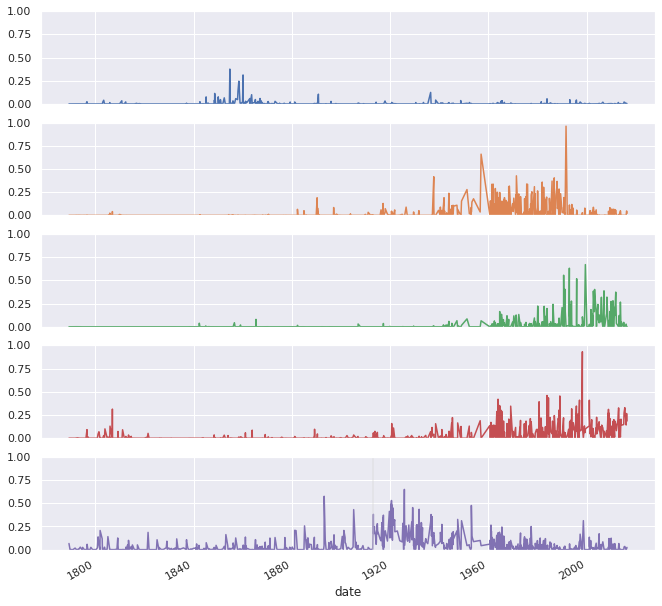

In [51]:
import datetime
plot_cols = col_labels

g = topicsot[plot_cols].plot(figsize=(11, 11), subplots=True, ylim=(0,1), 
                             legend = None)
dateline = datetime.datetime(1913, 3, 4)
x_lim = [dateline,dateline]
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, color = '#dadada', alpha = 0.5)


# Now add topic info


In [52]:
[print_topic(lda_model,t, n=8) for t in range(50)]


#[print_topic(lda_model,t, n=8) for t in topics_to_plot]

Topic 00: soviet soviet_union communist agreement area negotiation treaty united_nation
Topic 01: veteran yesterday righteousness heal oklahoma wound lost child
Topic 02: mexico subject amount treaty revenue treasury article general
Topic 03: officer person appointment examination commission office provided rule
Topic 04: object principle circumstance fellow_citizen view character union subject
Topic 05: economy job deficit investment business income reform cost
Topic 06: panama canal isthmus water construction article city nicaragua
Topic 07: card unemployed think plan census help vice_president going
Topic 08: island ship labor philippine china navy whole forest
Topic 09: legitimate_business derangement depreciated moneyed intending unproductive interior ashore
Topic 10: senate treaty office secretary letter resolution general executive
Topic 11: amount_public andrew president_elect claim pension bill city troop
Topic 12: child today family dream promise live woman student
Topic 13: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcab4dbeac8>,
      dtype=object)

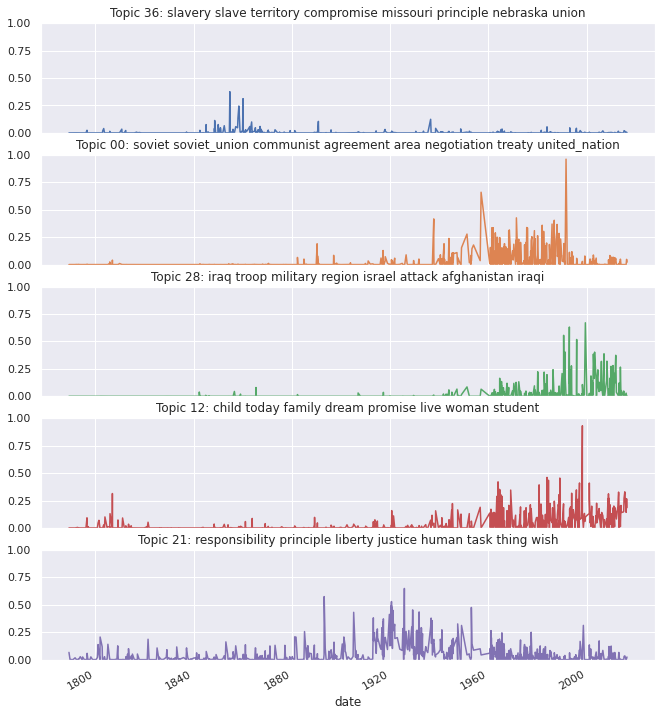

In [57]:

titles = [get_topic(lda_model,t, n=8) for t in topics_to_plot]


topicsot.plot(figsize=(11, 13), subplots=True, ylim=(0,1), title=titles, legend=None)

